In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel(r'C:\Users\DELL\Downloads\mcdonalds().xlsx')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3.0,61.0,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51.0,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62.0,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69.0,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49.0,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47.0,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36.0,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52.0,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41.0,Every three months,Male


# Lets do some Data Mining

In [153]:
# It will provide information about the datatype in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [154]:
# Checking the missing value in the dataset
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## There is no missing value in the dataset

In [155]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [156]:
# Finding The Unique Value of the data
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

yummy
Yes    803
No     650
Name: yummy, dtype: int64

convenient
Yes    1319
No      134
Name: convenient, dtype: int64

spicy
No     1317
Yes     136
Name: spicy, dtype: int64

fattening
Yes    1260
No      193
Name: fattening, dtype: int64

greasy
Yes    765
No     688
Name: greasy, dtype: int64

fast
Yes    1308
No      145
Name: fast, dtype: int64

cheap
Yes    870
No     583
Name: cheap, dtype: int64

tasty
Yes    936
No     517
Name: tasty, dtype: int64

expensive
No     933
Yes    520
Name: expensive, dtype: int64

healthy
No     1164
Yes     289
Name: healthy, dtype: int64

disgusting
No     1100
Yes     353
Name: disgusting, dtype: int64

Like
+3              229
+2              187
0               169
+4              160
I hate it!-5    152
+1              152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

Age
55    53
60    38
37    37
52    36
57    36
59    36
58    35
36    35
49    34
62    3

## Que1  
## The distribution of gender to recognize different distributions?

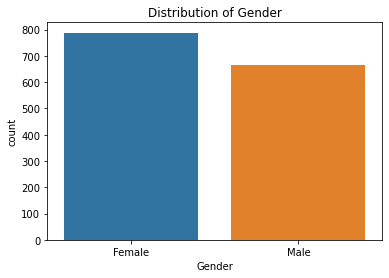

In [157]:

sns.countplot(x='Gender', data=data);
plt.title('Distribution of Gender');

## There are more Female than male in this data set.They will perhaps be a significant element in our customer segmentation efforts later

## Que2
## how the Gender think about the Qualities and in what ratio?

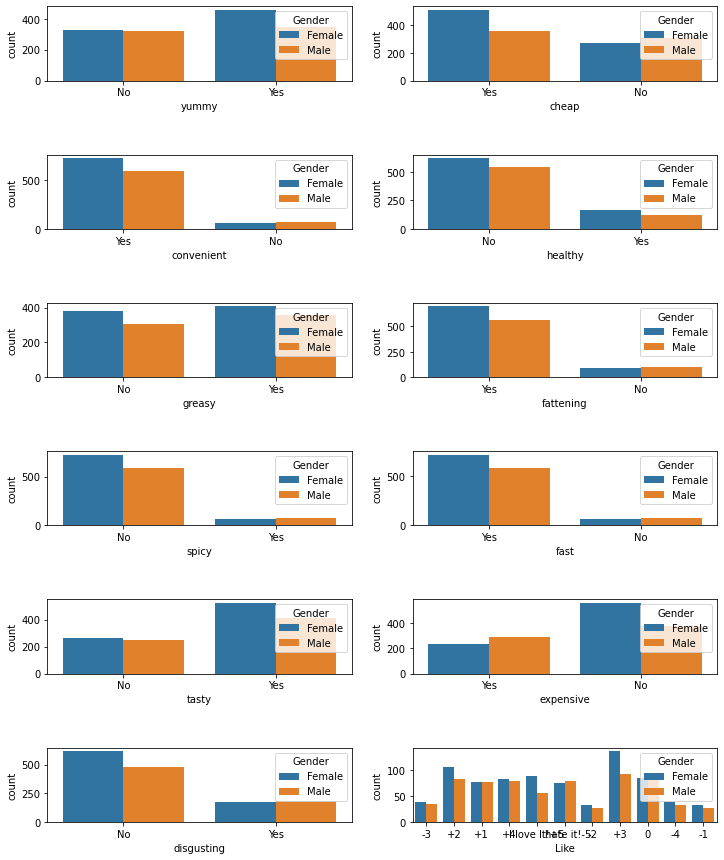

In [158]:
label_list=[ 'yummy', 'cheap', 'convenient', 'healthy', 'greasy','fattening','spicy','fast','tasty','expensive','disgusting','Like']
fig,axes = plt.subplots(6,2,figsize=(12,15))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    sns.countplot(x=cat,data=data,hue='Gender',ax=axes[row,col]) 
plt.subplots_adjust(hspace=1) # Plotting the graphs

In [159]:
# we make a ageband in three age group 
data.loc[(data['Age'] >= 18) & (data['Age'] <= 36), 'Age'] = 1
data.loc[(data['Age'] > 36) & (data['Age'] <= 50), 'Age'] = 2
data.loc[(data['Age'] > 50) & (data['Age'] <= 71), 'Age'] = 3

# Que 3
## What they prefer acc to the agegroup?

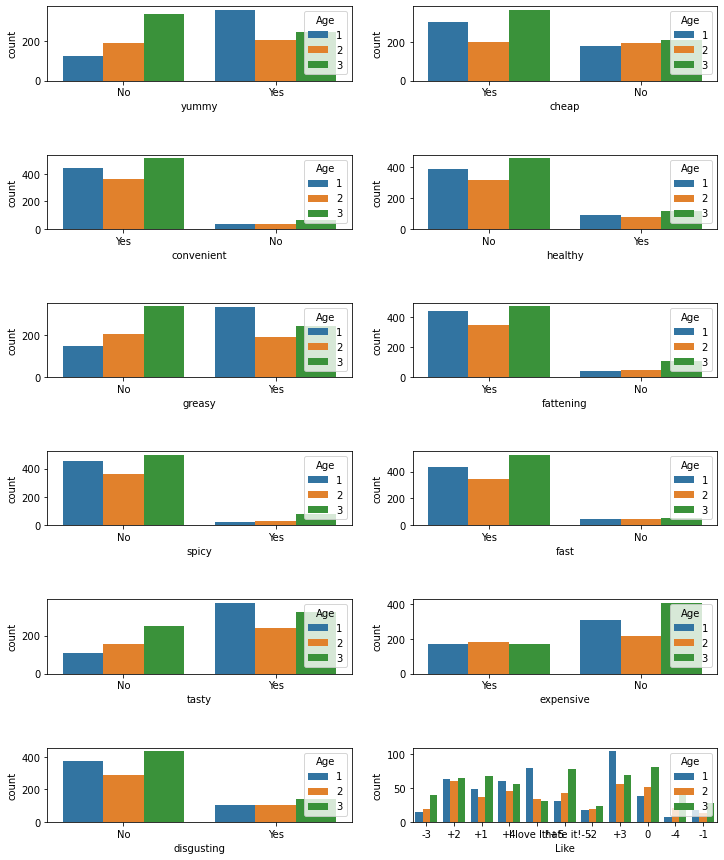

In [160]:
label_list=[ 'yummy', 'cheap', 'convenient', 'healthy', 'greasy','fattening','spicy','fast','tasty','expensive','disgusting','Like']
fig,axes = plt.subplots(6,2,figsize=(12,15))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    sns.countplot(x=cat,data=data,hue='Age',ax=axes[row,col]) 
plt.subplots_adjust(hspace=1) # Plotting the graphs

In [145]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['yummy'] = le.fit_transform(data['yummy'])
data['convenient'] = le.fit_transform(data['convenient'])
data['spicy'] = le.fit_transform(data['spicy'])
data['fattening'] = le.fit_transform(data['fattening'])
data['greasy'] = le.fit_transform(data['greasy'])

data['fast'] = le.fit_transform(data['fast'])
data['cheap'] = le.fit_transform(data['cheap'])
data['healthy'] = le.fit_transform(data['healthy'])

data['disgusting'] = le.fit_transform(data['disgusting'])

data['disgusting'] = le.fit_transform(data['disgusting'])
data['expensive'] = le.fit_transform(data['expensive'])
data['tasty'] = le.fit_transform(data['tasty'])
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [146]:

data.Like=data.Like.replace('I hate it!-5','-5')
data.Like=data.Like.replace('I love it!+5','+5')

In [147]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


## Que3 
## What are the correlation among the different Qualities of mcdonald with the Gender who prefer to eat outside?

<AxesSubplot:>

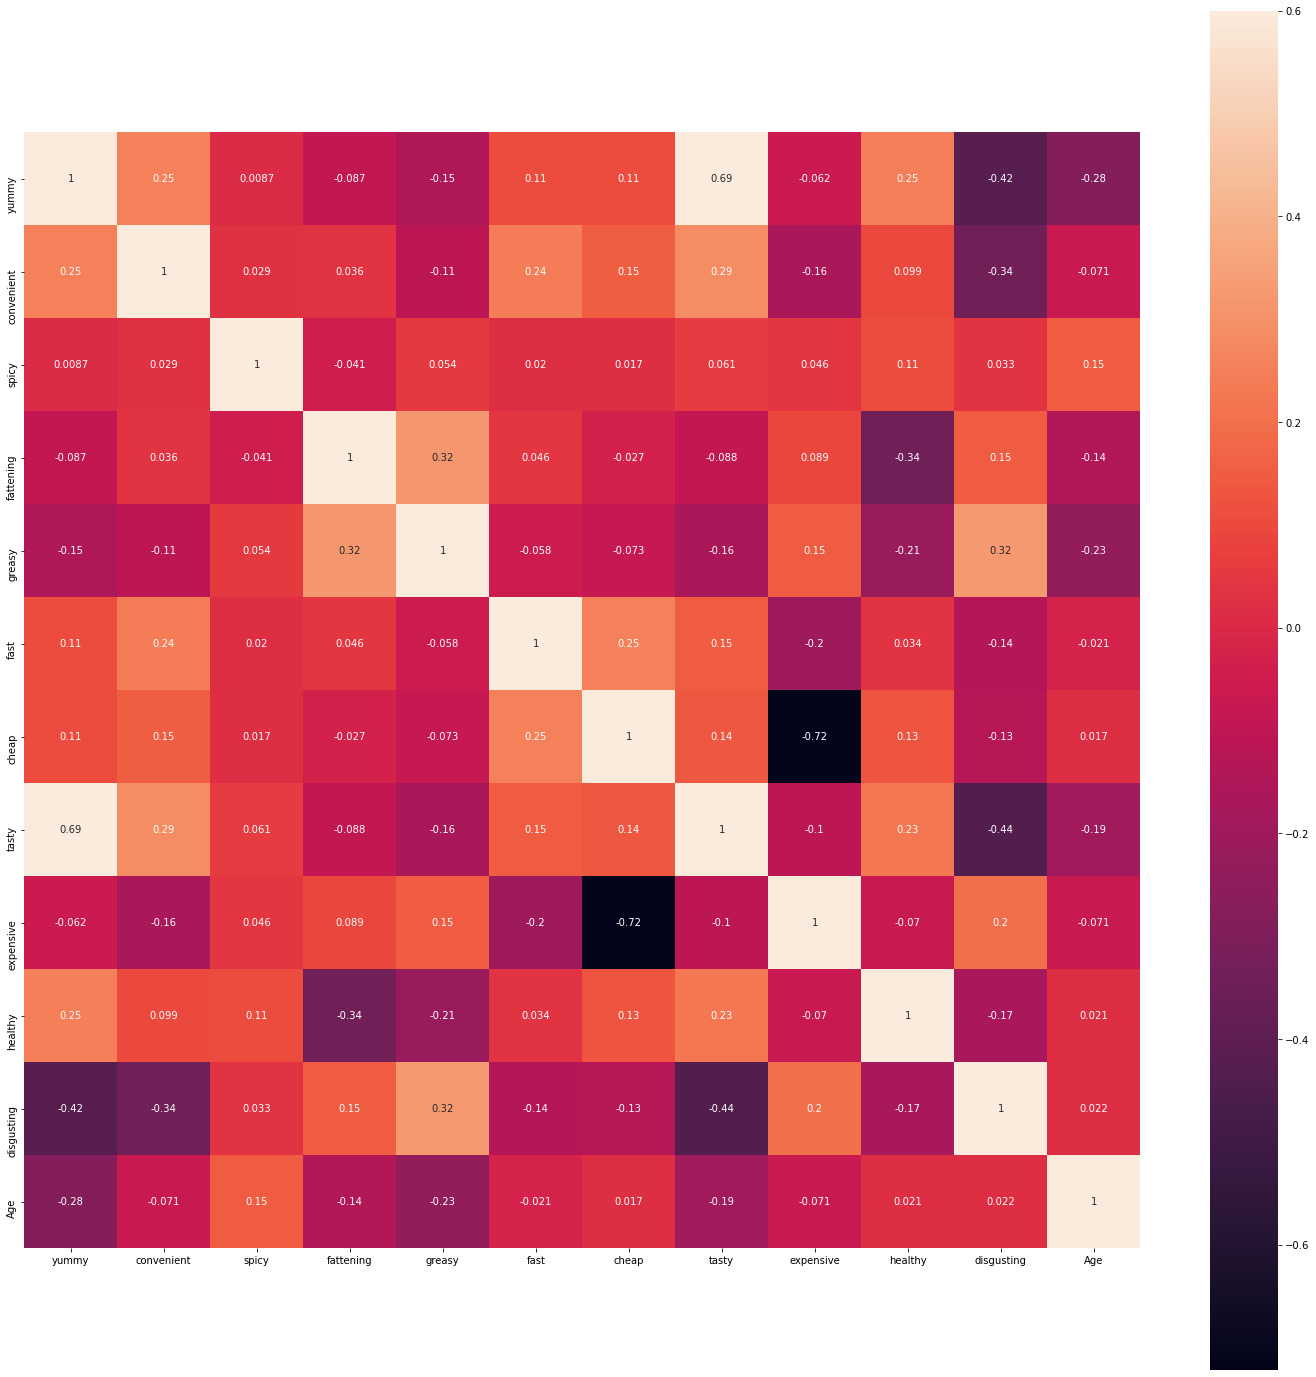

In [148]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

## from the above correlation,we found that people are more conscious about cheapness,expensive and the taste.

## Que 4 
## which AgeGroup of people are more who visits mcdonald frequently?

<AxesSubplot:xlabel='Age', ylabel='count'>

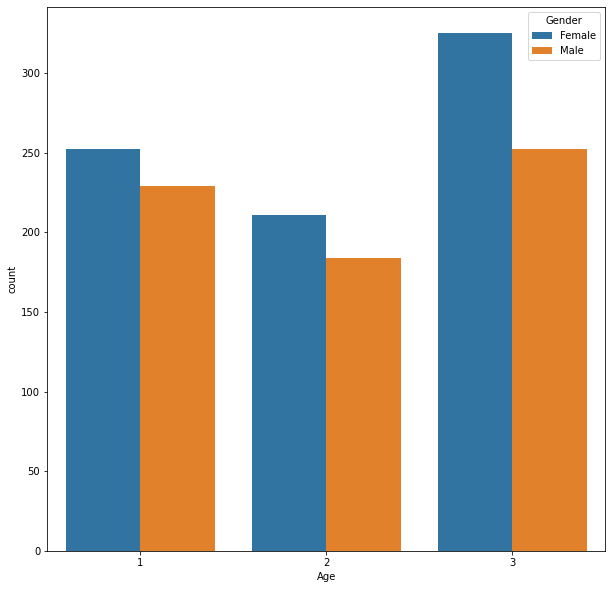

In [150]:
# See the distribution of Ages to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='Age', hue='Gender', data=data)